In [ ]:
import math
import random
import matplotlib.pyplot as plt

**Problem Statement:**

In this project we have created a system which will help delivery boys to deliver parcel in a time  efficient order. The problem is to rank the delivery location in the order, the delivery boy should visit to optimize the trip. The problem is very similar to the travelling salesman problem and we have tired to optimize it using Artificial Intelligence.

The above problem is an NP-hard problem. The brute force solution is not practically possible as the time complexity is O(n!). An optimized approach using DP is also not relevant as its time complexity is O(n^2 . 2^n). Using the optimized approach we can compute for n <= 23 in feasible time. 

**Solution:**

We have solved this problem using simmulated annealing algorithm. We have tested for two type of neighbourhood generation methods

1. Choose two locations randomly and swap them
2. Choose a random segment of the current path and reverse it

In [ ]:
class City:
    def __init__(self, name, lat, lng):
        self.lat = lat
        self.lng = lng
        self.name = name

In [ ]:
class TSP:
    def __init__(self, coordinates, initial_temp=-1, snhg = False):
        self.snhg = snhg
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = math.sqrt(N) if initial_temp==-1 else initial_temp
        self.alpha = 0.999
        self.stop_T = 1e-10
        self.nodes = [i for i in range(self.N)]
        self.best_path = None
        self.best_fit = float('Inf')
        self.fitness_list = []
        
    def cost(self, city1, city2):
        # This function return distance between two cities
        # in kilo meters
        cityA = (city1.lat, city1.lng)
        cityB = (city2.lat, city2.lng)
        
        # return geodesic(cityA, cityB).km
        return (city1.lat - city2.lat)**2 + (city1.lng - city2.lng)**2
    
    def fitness(self, path):
        # This function computes total cost for following solution path
        fit = 0
        n = self.N
        coords = self.coordinates
        for i in range(n):
            fit += self.cost(coords[path[i % n]], coords[path[(i+1) % n]])
        return fit
    
    def initial_path(self):
        coords = self.coordinates
        curr_node = 4 #random.choice(self.nodes)
        path = [curr_node]
        nodes_left = set(self.nodes)
        
        while nodes_left:
            next_node = min(nodes_left, key=lambda x: self.cost(coords[curr_node], coords[x]))
            curr_node = next_node
            path.append(curr_node)
            nodes_left.remove(curr_node)
            
        fit = self.fitness(path)
        self.fitness_list.append(fit)
        
        if fit < self.best_fit:
            self.best_fit = fit
            self.best_path = path
        
        return fit, path
    
    def prob_accept(self, fitness):
        # this function will compute probability of accepting a solution with 
        # bad fitness
        return math.exp(-abs(fitness - self.curr_fitness)/ self.T)
    
    def accept_path(self, path):
        fitness = self.fitness(path)
        
        if fitness < self.curr_fitness:
            self.curr_fitness = fitness
            self.curr_path = path
            
            if fitness < self.best_fit:
                self.best_fit = fitness
                self.best_path = path
        else:
            if random.random() < self.prob_accept(fitness):
                self.curr_fitness = fitness
                self.curr_path = path
    
    def start(self):
        N = self.N
        self.curr_fitness, self.curr_path = self.initial_path()
        # print(self.curr_path)
        # print(self.curr_fitness)
        
        while self.T >= self.stop_T:
            path = list(self.curr_path)
            
            if(self.snhg):
              a = random.randint(1, N-1)
              b = random.randint(1, N-1)
              path[a], path[b] = path[b], path[a]
            else:
              start = random.randint(1, N-1)
              length = random.randint(2, N-1)
              
              path[start : (start+length)] = reversed(path[start : (start+length)])

            self.accept_path(path)
            
            self.T = self.T * self.alpha
            self.fitness_list.append(self.curr_fitness)
    
    def plot_fitness_learning(self):
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness f(n)")
        plt.xlabel("Iterations")
        plt.show()

We have tested for both the methods of neighbourhood generation. The output shows number of cases where method 1 (Choose two locations randomly and swap them) performs better than method 2 (Choose a random segment of the current path and reverse it).

0


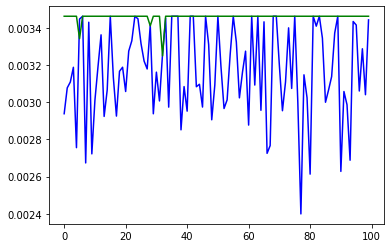

In [ ]:
cities = [ City('0', 23.208492, 72.613324),City('1', 23.201693498993656, 72.64445543857545),City('2', 23.20185127693657, 72.63956308941086),City('3', 23.206742300789138, 72.6468586978142),City('4', 23.216642131804818, 72.64917612636584),City('5', 23.20950328359702, 72.63986349681572),City('6', 23.216642131804818, 72.62883425352359),City('7', 23.207373387603145, 72.6311087667317),City('8', 23.198134687254047, 72.63224472517344),City('9', 23.23627985475752, 72.64343592053481),City('10', 23.236846677984722, 72.64682865408993),City('11', 23.23401253777306, 72.65124948872237),City('12', 23.23235926152179, 72.65022138764506),City('13', 23.22914712340476, 72.64055723751834),City('14', 23.233256756885027, 72.63279507438465),City('15', 23.229052647584133, 72.64024880719515),City('16', 23.22881645774003, 72.62996779642202),City('17', 23.226123863982046, 72.63726731407095),City('18', 23.22277274592091, 72.67275979516798),City('19', 23.241501203524585, 72.67460702229776),City('20', 23.251911052334325, 72.65558058286102),City('21', 23.24427347089138, 72.63193607559984),City('22', 23.247668005528574, 72.66629450021374),City('23', 23.23884203579948, 72.65915188864527),City('24', 23.22639416318717, 72.62430087013007),City('25', 23.258812786853426, 72.65237872249978),City('26', 23.252476781855716, 72.63747775698621),City('27', 23.25377795030707, 72.66210745204994),City('28', 23.23420250988928, 72.67503804200693),City('29', 23.220905414114767, 72.66198430362613),City('30', 23.217906311662013, 72.67085099384909),City('31', 23.218528772426332, 72.62497818679287),City('32', 23.25881278690115, 72.64191110209084),City('33', 23.21298311052329, 72.65687364184996),City('34', 23.20489055829563, 72.62405457316562),City('35', 23.228996995781984, 72.64831482278464),City('36', 23.207267442593828, 72.65693521606585),City('37', 23.197646459512228, 72.64178795360668),City('38', 23.229081870043593, 72.66072203173734),City('39', 23.233495250668593, 72.65576530560575),City('40', 23.230043773128646, 72.66903455382135)]

a = []
b = []

count = 0 # better count of snhg
for i in range(100):
  tsp = TSP(cities, initial_temp = 5000)
  tsp.start()
  a.append(tsp.best_fit)
  tsp = TSP(cities, initial_temp = 5000, snhg = True)
  tsp.start()
  b.append(tsp.best_fit)
  if(b<a):
    count += 1
print(count)

import matplotlib.pyplot as plt
plt.plot(a,'b-',b,'g-')
plt.show()

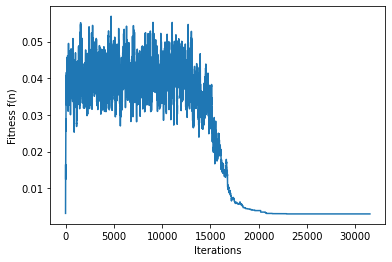

In [ ]:
tsp = TSP(cities, initial_temp = 5000)
tsp.start()
tsp.plot_fitness_learning()

In [ ]:
print(tsp.best_path)

[4, 4, 29, 30, 18, 40, 28, 19, 22, 27, 25, 32, 26, 20, 23, 38, 39, 11, 12, 10, 9, 21, 14, 15, 13, 17, 16, 24, 31, 6, 0, 34, 7, 5, 2, 8, 37, 1, 3, 36, 33, 35]


In [ ]:
res = []
for i in tsp.best_path:
    res.append(cities[i])

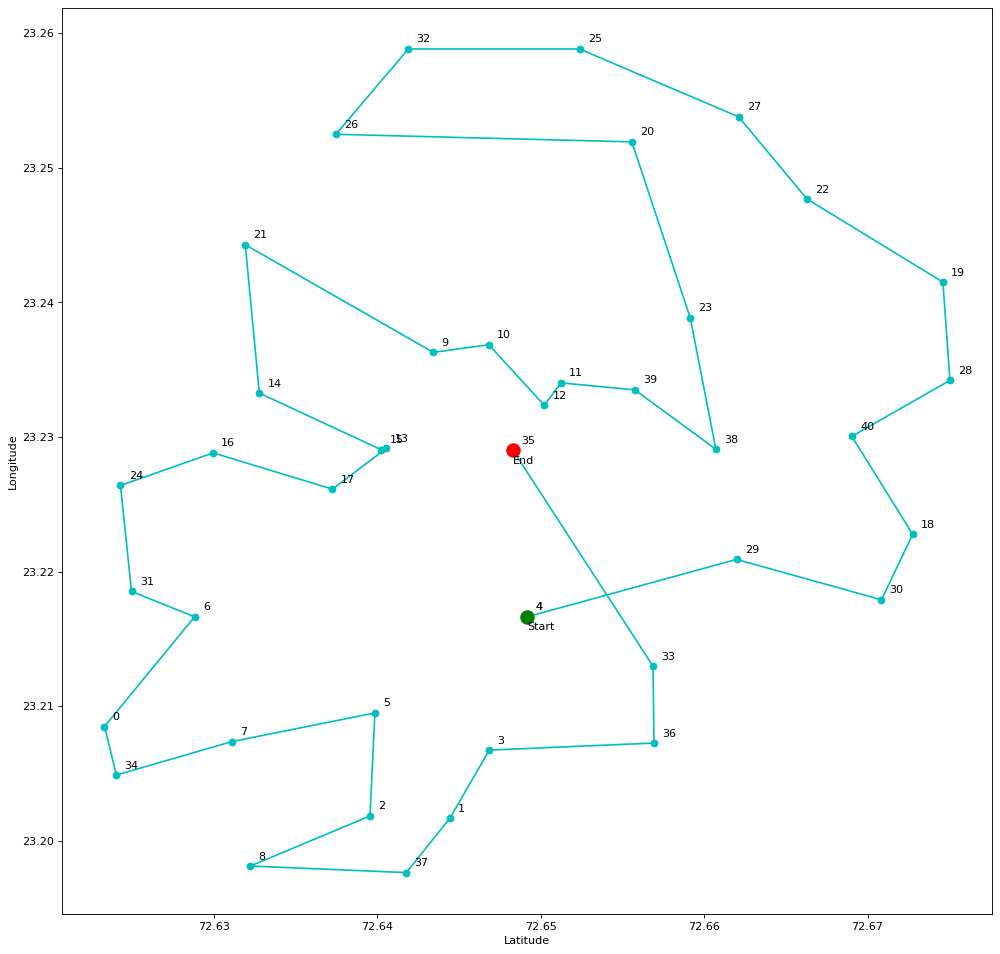

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)
y = []
for i in tsp.best_path:
    y.append(cities[i].lat)
    
x = []
for i in tsp.best_path:
    x.append(cities[i].lng)
    
plt.plot(x, y, 'oc-')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
for city in res:
    plt.text(city.lng + 0.0005, city.lat+ 0.0005, city.name)

plt.text(res[0].lng, res[0].lat- 0.001, 'Start')
plt.plot(res[0].lng, res[0].lat, 'go', markersize=12)
plt.text(res[-1].lng, res[-1].lat- 0.001, 'End')
plt.plot(res[-1].lng, res[-1].lat, 'ro', markersize=12)
plt.show()

In [ ]:
tsp.best_fit

0.003107251816086149

#**Genetic Algorithm**

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [ ]:
def distance_between_cities(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data

In [ ]:
cityList  = [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             ,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]    
val = distance_between_cities(cityList).values()

In [ ]:
print(val)

dict_values([7.699756348069267, 10.507479614123506, 10.6710175094333, 13.345476366874312, 4.409775601291549, 9.487142456541129, 21.2938948898453])


In [ ]:
def total_distance(cities):
    total = sum(distance_between_cities(cities).values())
    return total
total_distance(cityList)

77.41454278617837

In [ ]:
def generatePath(cities):
    path = random.sample(cities, len(cities))
    return path
list= generatePath(cityList)
print(list)

[[85.158875, 25.612677], [72.88261, 19.07283], [80.9231262, 26.8392792], [73.856255, 18.516726], [77.580643, 12.972442], [74.797371, 34.083656], [77.216721, 28.6448]]


In [ ]:
import numpy as np
city_names = ['Bangalore', 'Mumbai', 'Delhi', 'Pune','Patna','Lucknow','Kashmir']
def plot_pop(cities):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    j =[77.580643, 72.88261, 77.216721, 73.856255,85.158875,80.9231262,74.797371]
    k = [12.972442, 19.07283, 28.644800, 18.516726,25.612677,26.8392792,34.083656]
   
    
    for i, txt in enumerate(city_names):
        plt.annotate(txt, (j[i], k[i]),horizontalalignment='center', 
            #verticalalignment='bottom',
                    )
    plt.show()
    return 

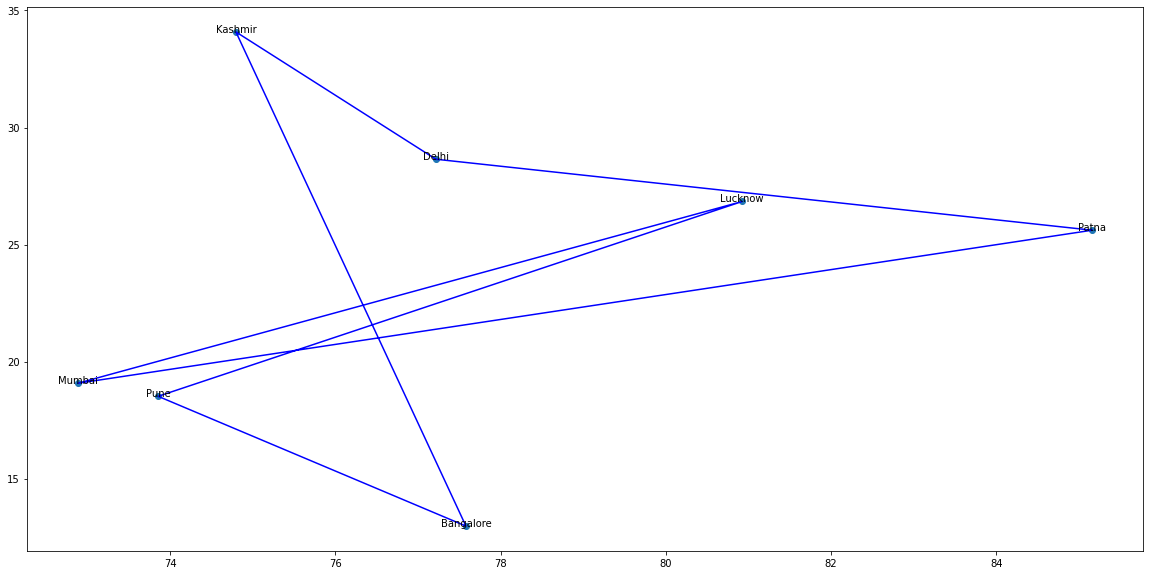

In [ ]:
plot_pop(list)

In [ ]:
def initialPopulation(cities, populationSize):
    population = [generatePath(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(cityList,10)

In [ ]:
for idx, pop_plot in enumerate (population):
    print('Initial Population '+ str(idx),pop_plot)

Initial Population 0 [[80.9231262, 26.8392792], [77.580643, 12.972442], [73.856255, 18.516726], [77.216721, 28.6448], [85.158875, 25.612677], [72.88261, 19.07283], [74.797371, 34.083656]]
Initial Population 1 [[74.797371, 34.083656], [77.216721, 28.6448], [72.88261, 19.07283], [80.9231262, 26.8392792], [73.856255, 18.516726], [77.580643, 12.972442], [85.158875, 25.612677]]
Initial Population 2 [[72.88261, 19.07283], [74.797371, 34.083656], [85.158875, 25.612677], [73.856255, 18.516726], [77.216721, 28.6448], [80.9231262, 26.8392792], [77.580643, 12.972442]]
Initial Population 3 [[73.856255, 18.516726], [77.580643, 12.972442], [85.158875, 25.612677], [77.216721, 28.6448], [80.9231262, 26.8392792], [74.797371, 34.083656], [72.88261, 19.07283]]
Initial Population 4 [[80.9231262, 26.8392792], [73.856255, 18.516726], [85.158875, 25.612677], [72.88261, 19.07283], [74.797371, 34.083656], [77.580643, 12.972442], [77.216721, 28.6448]]
Initial Population 5 [[85.158875, 25.612677], [80.9231262, 2

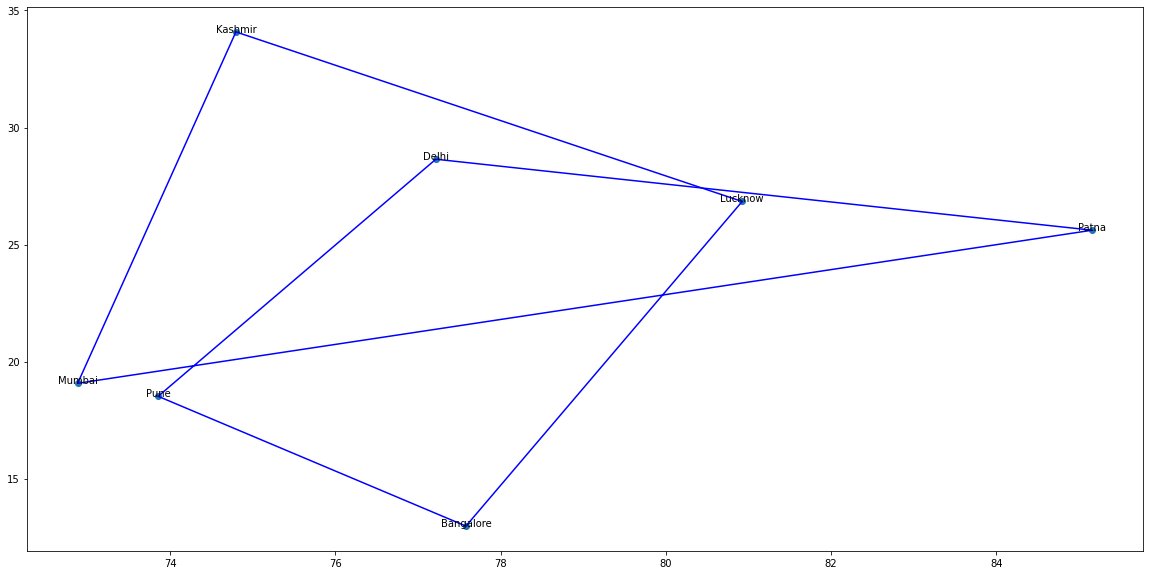

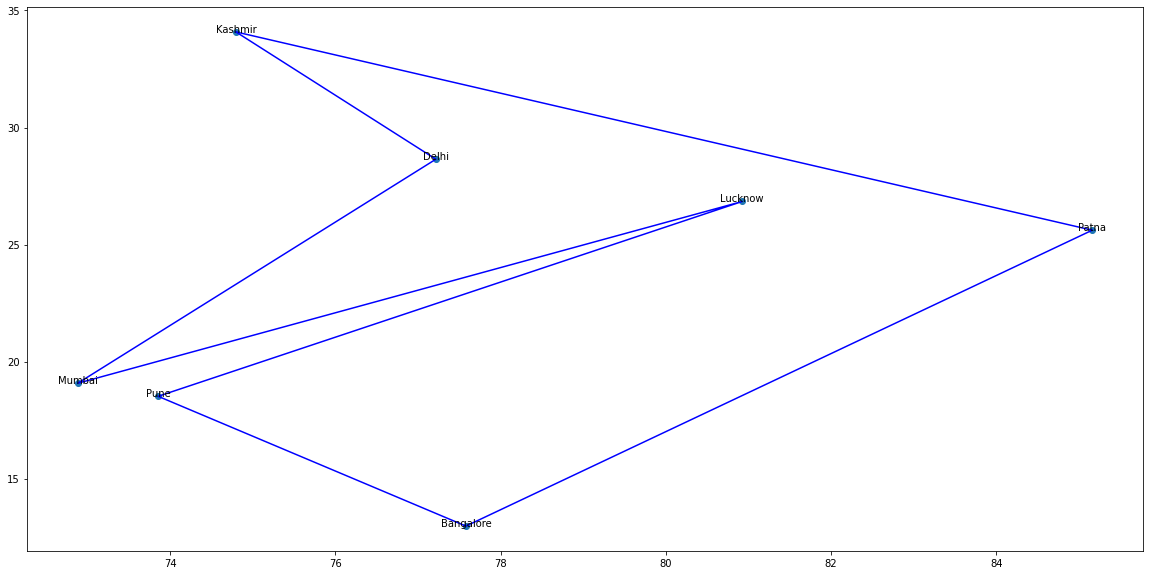

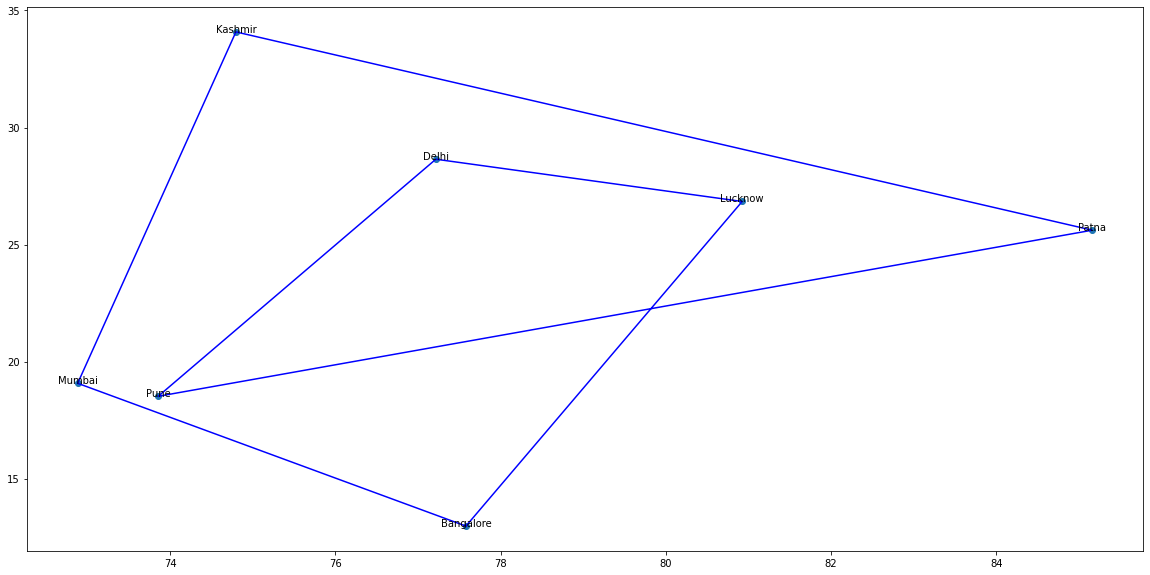

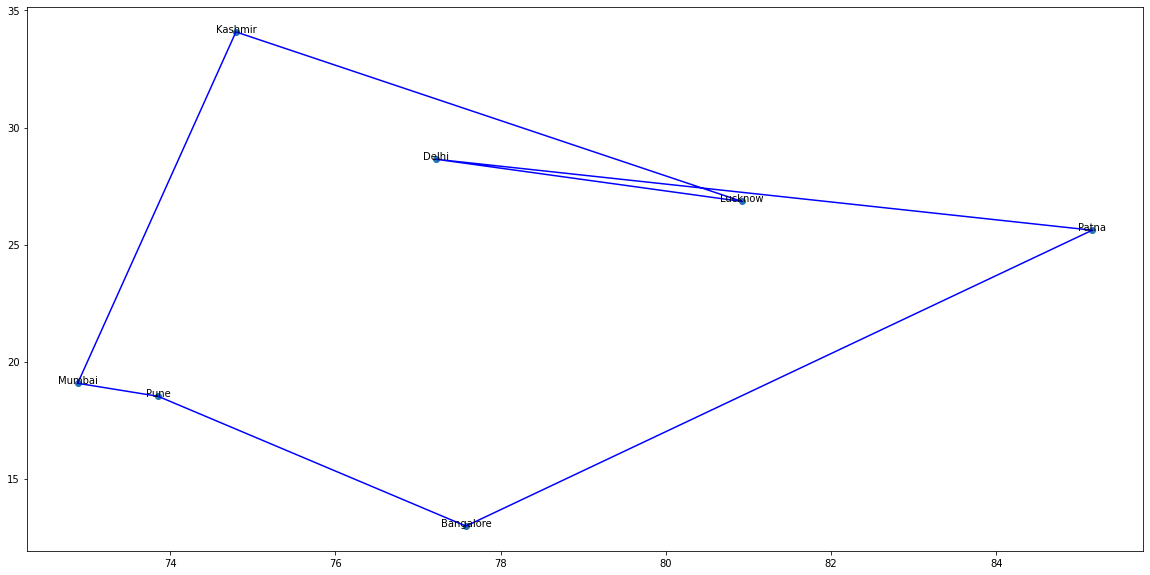

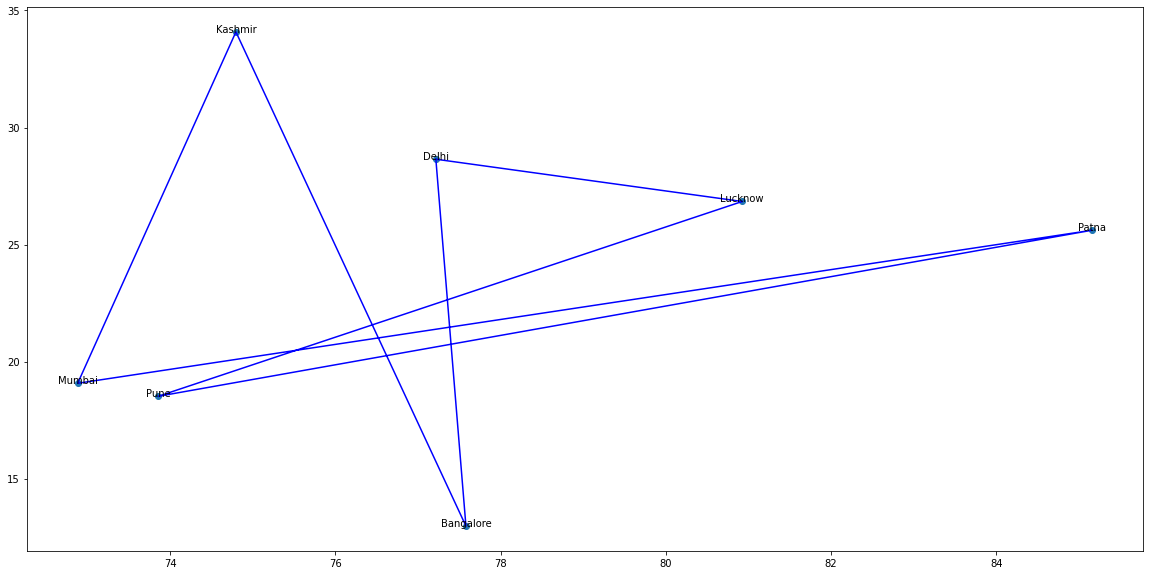

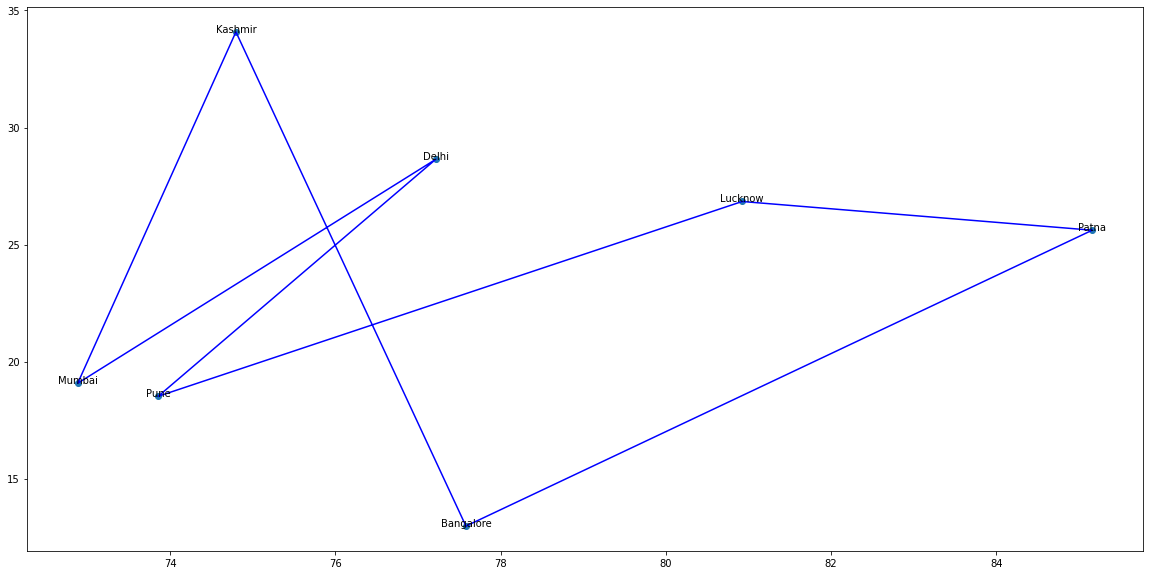

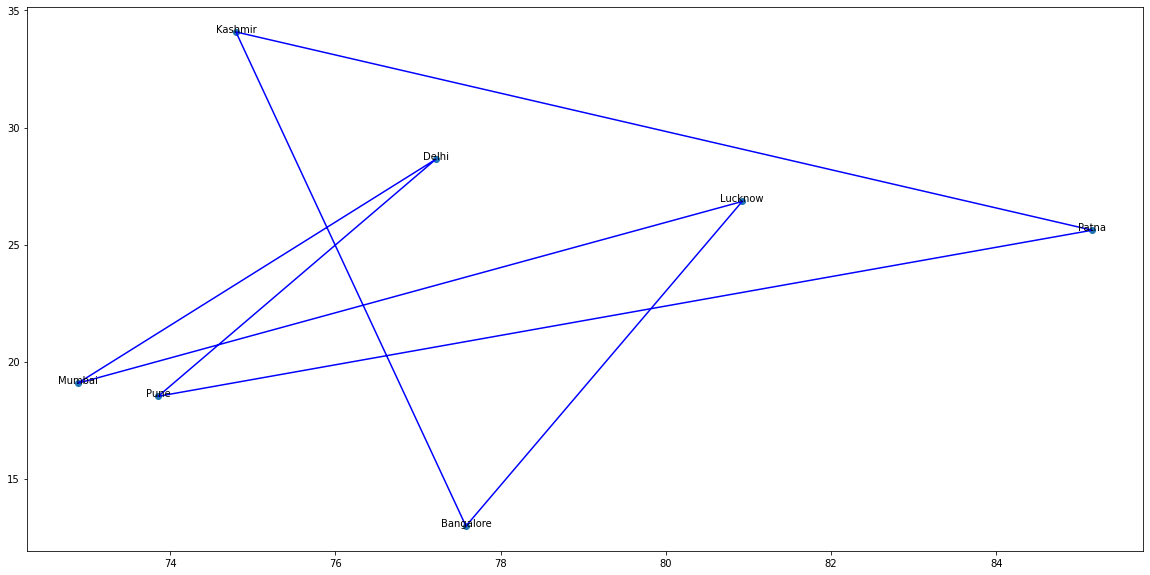

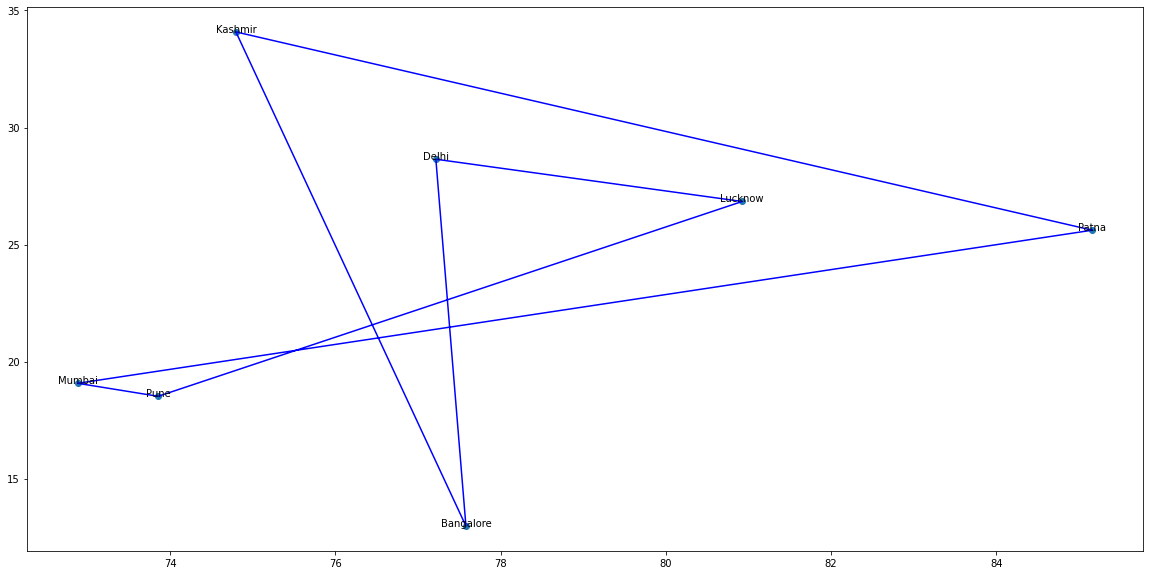

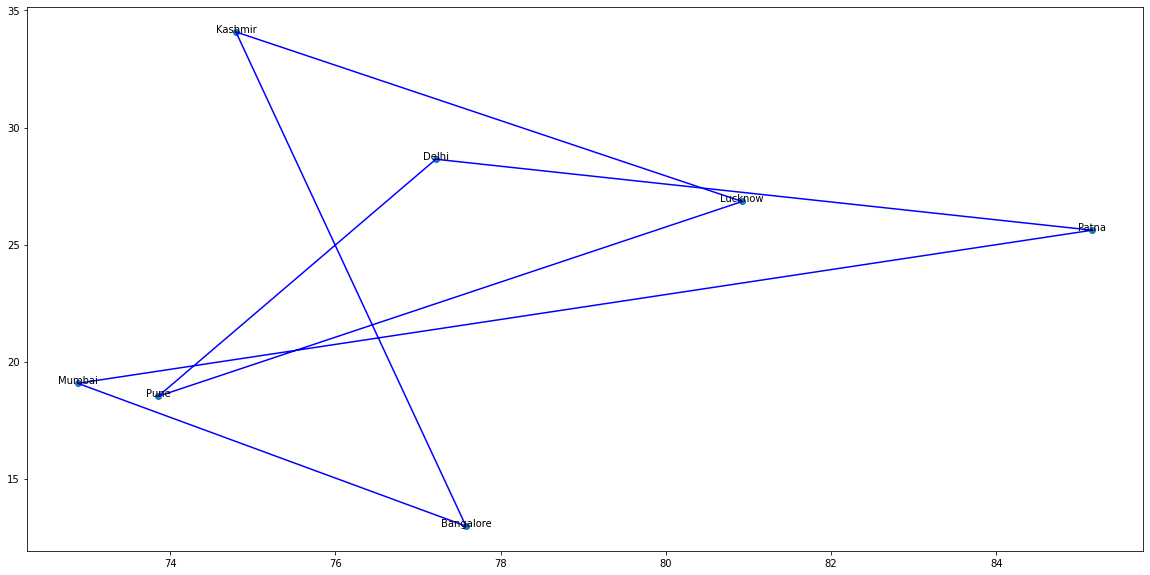

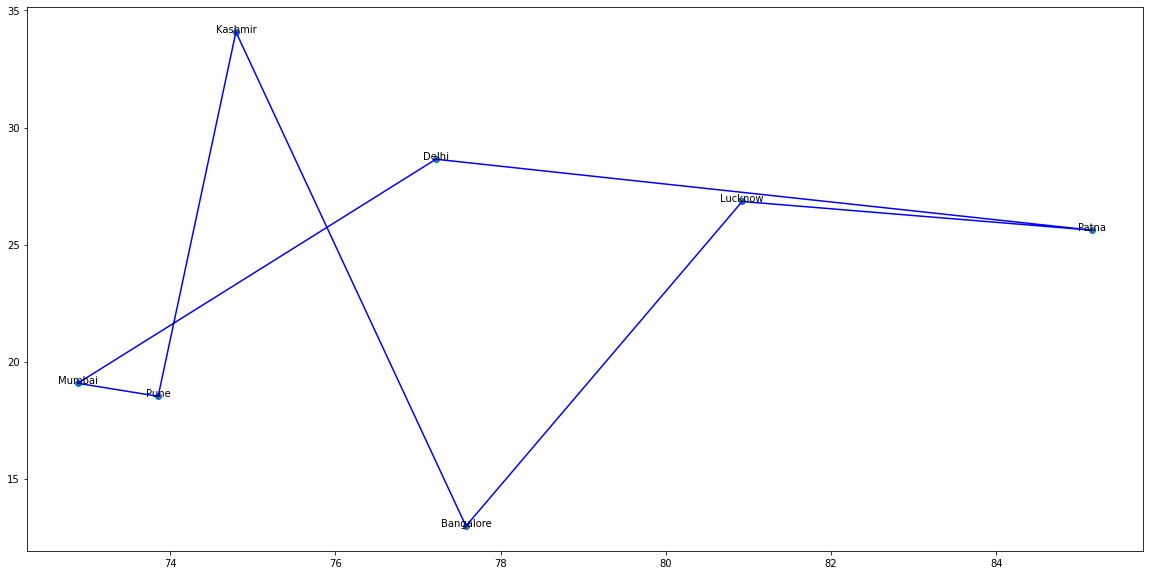

In [ ]:
for pop_plot in population:
    plot_pop(pop_plot)

In [ ]:
def path_fitness(cities):
    total_dis = total_distance(cities)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
path_fitness(cityList)

0.012917469560752097

In [ ]:
def rankPathes(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
rankPathes(population)

[(3, 0.01672747646675285),
 (1, 0.013631842774913916),
 (9, 0.013211256820120731),
 (2, 0.012719574125093037),
 (0, 0.012715442274977673),
 (7, 0.012433830515597917),
 (8, 0.012124035834868879),
 (5, 0.011406327905294346),
 (4, 0.010593343999072989),
 (6, 0.010565881582422927)]

In [ ]:
def perform_selection(pop, eliteSize):
    #output = rankPathes(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution. 
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
                
    return selected_values

In [ ]:
out11 = rankPathes(population)
selected_values = perform_selection(out11,5)
print(selected_values)

[3, 1, 9, 2, 0, 1, 5, 4, 0, 1]


In [ ]:
def do_mating_pool(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = do_mating_pool(population, selected_values)

In [ ]:
def do_breed(first_parent, second_parent):
    generation_1= int(random.random() * len(first_parent))
    generation_2 = int(random.random() * len(second_parent))
    
    first_generation = min(generation_1, generation_2)
    last_generation = max(generation_1, generation_2)

    tot_parent1 = [first_parent[i] for i in range(first_generation, last_generation)]
    tot_parent2 = [i for i in second_parent if i not in tot_parent1]

    tot = tot_parent1 + tot_parent2
    return tot

In [ ]:
def do_breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [do_breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
do_breed_population(mp,2)

[[[73.856255, 18.516726],
  [77.580643, 12.972442],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [74.797371, 34.083656],
  [72.88261, 19.07283]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [73.856255, 18.516726],
  [77.580643, 12.972442],
  [85.158875, 25.612677]],
 [[77.216721, 28.6448],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [73.856255, 18.516726],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [85.158875, 25.612677]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442]],
 [[77.580643, 12.972442],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [74.797371, 34.083656],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [85.158875, 25.612677]],
 [[77.216721, 28.6448],
  [73.856255, 18.516726],
  [77.580643, 12.972442],
  [85.158875, 25.61

In [ ]:
def do_mutatation(indiv, mutat_rate):
    for exchanged in range(len(indiv)):
        if(random.random() < mutat_rate):
            exchanged_with = int(random.random() * len(indiv))
            
            city1 = indiv[exchanged]
            city2 = indiv[exchanged_with]
            
            indiv[exchanged] = city2
            indiv[exchanged_with] = city1
    return indiv

In [ ]:
def do_mutatation_pop(population, mutat_rate):
    mutated_population = [do_mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
do_mutatation_pop(population, 0.01)

[[[80.9231262, 26.8392792],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
  [74.797371, 34.083656]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [73.856255, 18.516726],
  [85.158875, 25.612677],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442]],
 [[73.856255, 18.516726],
  [77.580643, 12.972442],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [74.797371, 34.083656],
  [72.88261, 19.07283]],
 [[80.9231262, 26.8392792],
  [73.856255, 18.516726],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [77.216721, 28.6448]],
 [[85.158875, 25.612677],
  [80.9231262, 26.8392792],
  [73.856255, 18.516726],
  [77.216721, 2

In [ ]:
def get_following_gen(existing_gen, eliteSize, mutat_rate):
    pop = rankPathes(existing_gen)
    
    selected_values = perform_selection(pop, eliteSize)
   
    my_mating_pool = do_mating_pool(existing_gen, selected_values)
    tot = do_breed_population(my_mating_pool, eliteSize)
    following_gen = do_mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
get_following_gen(population, 5, 0.01)

[[[73.856255, 18.516726],
  [77.580643, 12.972442],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [74.797371, 34.083656],
  [72.88261, 19.07283]],
 [[80.9231262, 26.8392792],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [85.158875, 25.612677],
  [72.88261, 19.07283],
  [74.797371, 34.083656]],
 [[74.797371, 34.083656],
  [73.856255, 18.516726],
  [72.88261, 19.07283],
  [77.216721, 28.6448],
  [85.158875, 25.612677],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [74.797371, 34.083656],
  [85.158875, 25.612677],
  [73.856255, 18.516726],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [77.580643, 12.972442]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [73.856255, 18.516726],
  [85.158875, 25.612677],
  [77.580643, 12.972442]],
 [[73.856255, 18.516726],
  [85.158875, 25.612677],
  [74.797371, 34.083656],
  [72.88261, 19.0

In [ ]:
#cityList  =  [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             #,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]  
#city_names =['Bangalore', 'Mumbai', 'Delhi', 'Pune','Patna','Lucknow','Kashmir']
def get_names(result_lst, cities, name_lst):
    names = []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(cities):
            if value == v:
                names.append(name_lst[i])
    return names

Incipient distance: 57.69267974351923
Eventual distance: 52.15592519829275
[(0, 'Patna'), (1, 'Lucknow'), (2, 'Delhi'), (3, 'Kashmir'), (4, 'Mumbai'), (5, 'Pune'), (6, 'Bangalore')]


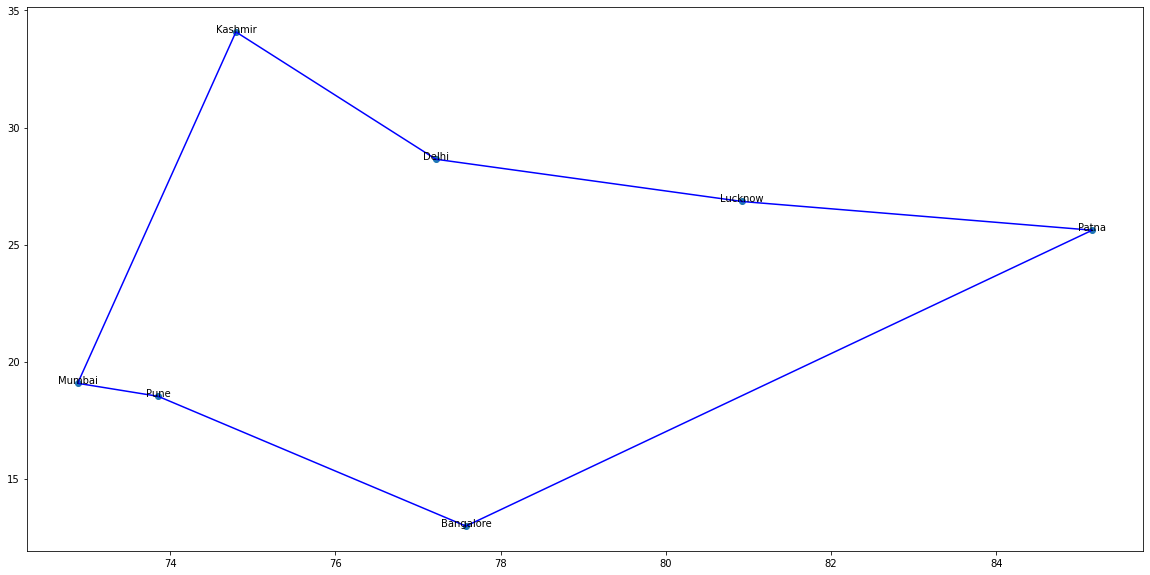

In [ ]:
def GA(city_names,cities, population_size, eliteSize, mutat_rate, generations):
    population = initialPopulation(cities,population_size)
    #print(population_)
    print("Incipient distance: " + str(1 / rankPathes(population)[0][1]))
    for i in range(generations):
        population = get_following_gen(population, eliteSize, mutat_rate)
        #print(population)
    
    print("Eventual distance: " + str(1 / rankPathes(population)[0][1]))
    optimal_route_id = rankPathes(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_cities = get_names(optimal_route,cities,city_names)
    print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_pop(optimal_route)
    return optimal_route

result_lst = GA(city_names,cityList, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)

In [ ]:
print(result_lst)

[[85.158875, 25.612677], [80.9231262, 26.8392792], [77.216721, 28.6448], [74.797371, 34.083656], [72.88261, 19.07283], [73.856255, 18.516726], [77.580643, 12.972442]]
